<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tensorflow-+-Pandas" data-toc-modified-id="Tensorflow-+-Pandas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tensorflow + Pandas</a></span><ul class="toc-item"><li><span><a href="#DataFrame을-Tensor로-바꾸기" data-toc-modified-id="DataFrame을-Tensor로-바꾸기-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>DataFrame을 Tensor로 바꾸기</a></span></li><li><span><a href="#plot_model" data-toc-modified-id="plot_model-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>plot_model</a></span></li><li><span><a href="#도전" data-toc-modified-id="도전-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>도전</a></span></li><li><span><a href="#정형데이터-(고급)" data-toc-modified-id="정형데이터-(고급)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>정형데이터 (고급)</a></span><ul class="toc-item"><li><span><a href="#feature_column" data-toc-modified-id="feature_column-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>feature_column</a></span></li></ul></li></ul></li></ul></div>

## Tensorflow + Pandas

### DataFrame을 Tensor로 바꾸기

이번 수업은 tensorflow 공식 tutorial [pandas.dataframe](https://www.tensorflow.org/tutorials/load_data/pandas_dataframe)을 참조하여 진행되었습니다.

In [2]:
import tensorflow as tf
import seaborn as sns

C:\Users\JINHYO\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
iris = sns.load_dataset('iris')

In [5]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [77]:
target = iris.pop('species')

In [78]:
inputs = {key: tf.keras.layers.Input(shape=(), name=key) for key in iris.keys()}

In [79]:
# 얼마만큼 있을지 모를 때 shape이 None이다.
inputs

{'sepal_length': <tf.Tensor 'sepal_length_1:0' shape=(None,) dtype=float32>,
 'sepal_width': <tf.Tensor 'sepal_width_1:0' shape=(None,) dtype=float32>,
 'petal_length': <tf.Tensor 'petal_length_1:0' shape=(None,) dtype=float32>,
 'petal_width': <tf.Tensor 'petal_width_1:0' shape=(None,) dtype=float32>}

dictionary는 `keys`,`items`, `values` 가 있다.  
반환값은 list와 비슷한 sequence 타입이지만 list는 아니다.

In [80]:
# tensor에서 values하면 numpy로 바뀐다.
# dictionary에서 values()는 value만 보여준다.
inputs.values()

dict_values([<tf.Tensor 'sepal_length_1:0' shape=(None,) dtype=float32>, <tf.Tensor 'sepal_width_1:0' shape=(None,) dtype=float32>, <tf.Tensor 'petal_length_1:0' shape=(None,) dtype=float32>, <tf.Tensor 'petal_width_1:0' shape=(None,) dtype=float32>])

In [81]:
inputs.keys()

dict_keys(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [82]:
inputs.items()

dict_items([('sepal_length', <tf.Tensor 'sepal_length_1:0' shape=(None,) dtype=float32>), ('sepal_width', <tf.Tensor 'sepal_width_1:0' shape=(None,) dtype=float32>), ('petal_length', <tf.Tensor 'petal_length_1:0' shape=(None,) dtype=float32>), ('petal_width', <tf.Tensor 'petal_width_1:0' shape=(None,) dtype=float32>)])

In [83]:
# type casting
list(inputs.values())

[<tf.Tensor 'sepal_length_1:0' shape=(None,) dtype=float32>,
 <tf.Tensor 'sepal_width_1:0' shape=(None,) dtype=float32>,
 <tf.Tensor 'petal_length_1:0' shape=(None,) dtype=float32>,
 <tf.Tensor 'petal_width_1:0' shape=(None,) dtype=float32>]

feature 별로 tenosr가 만들어졌다.  
합치기 위해서 `stack`을 사용한다.  
numpy의 `stack`부터 복습해보자.

In [84]:
import numpy as np

In [85]:
a = np.array([1,2,3])

In [86]:
np.stack([a, a])

array([[1, 2, 3],
       [1, 2, 3]])

In [87]:
# axis=-1은  마지막 차원 의미한다.
np.stack([a, a], axis=-1)

array([[1, 1],
       [2, 2],
       [3, 3]])

In [88]:
# tensorflow의 stack을 비교해보자.
tf.stack([a, a], axis=1)

<tf.Tensor: id=3298, shape=(3, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [3, 3]])>

feature tensor들을 `stack`한 결과는 다음과 같다.

In [89]:
# shape이 (None, 5)이다.
tf.stack(list(inputs.values()), axis=-1)

<tf.Tensor 'stack_4:0' shape=(None, 4) dtype=float32>

model 만들 때 None이 어떻게 붙었는지 생각해보자.

In [90]:
# mnist는 학습데이터의 shape이 (60000, 28, 28)이었다.
# 그래서 input_shape이 (28, 28)이었다.
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=(28,28))
])

In [91]:
# summary에서는 (None, 28, 32)가 되었다.
# None이 맨 앞에 붙었다.
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 28, 32)            928       
Total params: 928
Trainable params: 928
Non-trainable params: 0
_________________________________________________________________


In [92]:
# None을 포함해서 input_shape을 넣어보자.
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=(None, 28,28))
])

In [93]:
# output shape에 None이 2개가 생겼다.
# 기본적으로 input_shape에 None이 하나 붙는다.
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, None, 28, 32)      928       
Total params: 928
Trainable params: 928
Non-trainable params: 0
_________________________________________________________________


In [94]:
# shape이 비어있으면 None만 들어간다.
tf.keras.layers.Input(shape=())

<tf.Tensor 'input_2:0' shape=(None,) dtype=float32>

In [95]:
# 데이터를 dict로 바꿔준다. 
# value도 dict로 되어있다. (dict 안에 dict 형태)
iris.to_dict()

{'sepal_length': {0: 5.1,
  1: 4.9,
  2: 4.7,
  3: 4.6,
  4: 5.0,
  5: 5.4,
  6: 4.6,
  7: 5.0,
  8: 4.4,
  9: 4.9,
  10: 5.4,
  11: 4.8,
  12: 4.8,
  13: 4.3,
  14: 5.8,
  15: 5.7,
  16: 5.4,
  17: 5.1,
  18: 5.7,
  19: 5.1,
  20: 5.4,
  21: 5.1,
  22: 4.6,
  23: 5.1,
  24: 4.8,
  25: 5.0,
  26: 5.0,
  27: 5.2,
  28: 5.2,
  29: 4.7,
  30: 4.8,
  31: 5.4,
  32: 5.2,
  33: 5.5,
  34: 4.9,
  35: 5.0,
  36: 5.5,
  37: 4.9,
  38: 4.4,
  39: 5.1,
  40: 5.0,
  41: 4.5,
  42: 4.4,
  43: 5.0,
  44: 5.1,
  45: 4.8,
  46: 5.1,
  47: 4.6,
  48: 5.3,
  49: 5.0,
  50: 7.0,
  51: 6.4,
  52: 6.9,
  53: 5.5,
  54: 6.5,
  55: 5.7,
  56: 6.3,
  57: 4.9,
  58: 6.6,
  59: 5.2,
  60: 5.0,
  61: 5.9,
  62: 6.0,
  63: 6.1,
  64: 5.6,
  65: 6.7,
  66: 5.6,
  67: 5.8,
  68: 6.2,
  69: 5.6,
  70: 5.9,
  71: 6.1,
  72: 6.3,
  73: 6.1,
  74: 6.4,
  75: 6.6,
  76: 6.8,
  77: 6.7,
  78: 6.0,
  79: 5.7,
  80: 5.5,
  81: 5.5,
  82: 5.8,
  83: 6.0,
  84: 5.4,
  85: 6.0,
  86: 6.7,
  87: 6.3,
  88: 5.6,
  89: 5.5,
  90

In [96]:
# 'list'는 value가 list로 된 dict를 반환한다.
iris.to_dict('list')

{'sepal_length': [5.1,
  4.9,
  4.7,
  4.6,
  5.0,
  5.4,
  4.6,
  5.0,
  4.4,
  4.9,
  5.4,
  4.8,
  4.8,
  4.3,
  5.8,
  5.7,
  5.4,
  5.1,
  5.7,
  5.1,
  5.4,
  5.1,
  4.6,
  5.1,
  4.8,
  5.0,
  5.0,
  5.2,
  5.2,
  4.7,
  4.8,
  5.4,
  5.2,
  5.5,
  4.9,
  5.0,
  5.5,
  4.9,
  4.4,
  5.1,
  5.0,
  4.5,
  4.4,
  5.0,
  5.1,
  4.8,
  5.1,
  4.6,
  5.3,
  5.0,
  7.0,
  6.4,
  6.9,
  5.5,
  6.5,
  5.7,
  6.3,
  4.9,
  6.6,
  5.2,
  5.0,
  5.9,
  6.0,
  6.1,
  5.6,
  6.7,
  5.6,
  5.8,
  6.2,
  5.6,
  5.9,
  6.1,
  6.3,
  6.1,
  6.4,
  6.6,
  6.8,
  6.7,
  6.0,
  5.7,
  5.5,
  5.5,
  5.8,
  6.0,
  5.4,
  6.0,
  6.7,
  6.3,
  5.6,
  5.5,
  5.5,
  6.1,
  5.8,
  5.0,
  5.6,
  5.7,
  5.7,
  6.2,
  5.1,
  5.7,
  6.3,
  5.8,
  7.1,
  6.3,
  6.5,
  7.6,
  4.9,
  7.3,
  6.7,
  7.2,
  6.5,
  6.4,
  6.8,
  5.7,
  5.8,
  6.4,
  6.5,
  7.7,
  7.7,
  6.0,
  6.9,
  5.6,
  7.7,
  6.3,
  6.7,
  7.2,
  6.2,
  6.1,
  6.4,
  7.2,
  7.4,
  7.9,
  6.4,
  6.3,
  6.1,
  7.7,
  6.3,
  6.4,
  6.0,
  6.9,
  6.

In [97]:
x = tf.stack(list(inputs.values()), axis=-1)

In [98]:
x = tf.keras.layers.Dense(10, activation='relu')(x)
output = tf.keras.layers.Dense(1)(x)
model_func = tf.keras.Model(inputs=inputs, outputs=output)

In [99]:
# 문자열 대신에 객체를 사용하면 세부 조정까지 할 수 있다.
tf.keras.losses.BinaryCrossentropy()

In [100]:
model_func.compile(optimizer='adam',
                   loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                   metrics=['accuracy'])

In [101]:
y = target.astype('category').cat.codes.values

In [102]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

In [103]:
data = tf.data.Dataset.from_tensor_slices((iris.to_dict('list'), y)).batch(150)

In [104]:
model_func.fit(data, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 945ms/step - loss: 0.3459 - accuracy: 0.3333
Epoch 2/5
1/1 [==============================] - 0s 102ms/step - loss: 0.3366 - accuracy: 0.3333
Epoch 3/5
1/1 [==============================] - 0s 108ms/step - loss: 0.3273 - accuracy: 0.3333
Epoch 4/5
1/1 [==============================] - 0s 126ms/step - loss: 0.3181 - accuracy: 0.3333
Epoch 5/5
1/1 [==============================] - 0s 140ms/step - loss: 0.3090 - accuracy: 0.3333


### plot_model

`plot_model`을 실행하기 위해서는 pydot, graphviz가 필요하므로 설치한다.

In [ ]:
!conda install pydot

In [ ]:
# graphviz 설치
# https://ci.appveyor.com/project/ellson/graphviz-pl238/build/job/bo6cggo9rtggtf3q/artifacts
# 경로 설정이 중요하다 (default로 하지말고 'all use'로 선택한다.)

In [ ]:
!conda install graphviz

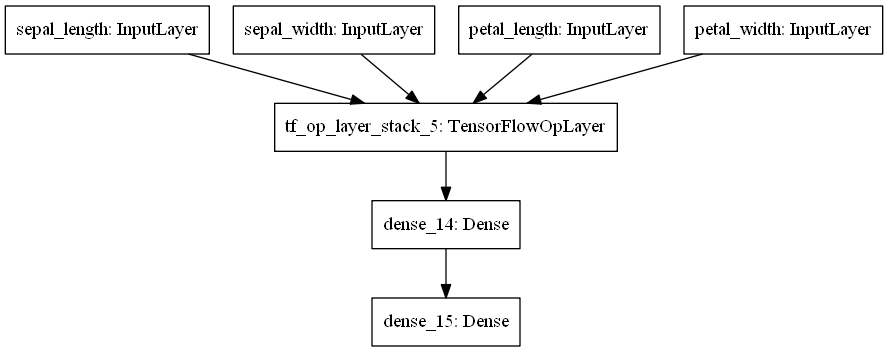

In [108]:
# 모델 구조를 그래프로 그려준다.
tf.keras.utils.plot_model(model_func)

---

위의 `plot_model`이 정상적으로 출력되면, sklearn에서 DecisionTree도 그래프를 그릴 수 있다.

In [115]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [116]:
dt = DecisionTreeClassifier()

In [117]:
dt.fit(iris, target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

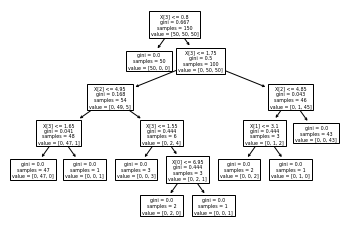

In [118]:
plot_tree(dt)

---

x를 계속 쓰면 모델 구조가 누적된다.  
앞에서 만든 모델에 구조가 추가되어서 원하는 결과를 얻을 수 없다.

In [119]:
x = tf.keras.layers.Dense(10, activation='relu', name='TTT')(x)
output = tf.keras.layers.Dense(1)(x)
model_func = tf.keras.Model(inputs=inputs, outputs=output, name='AAA')

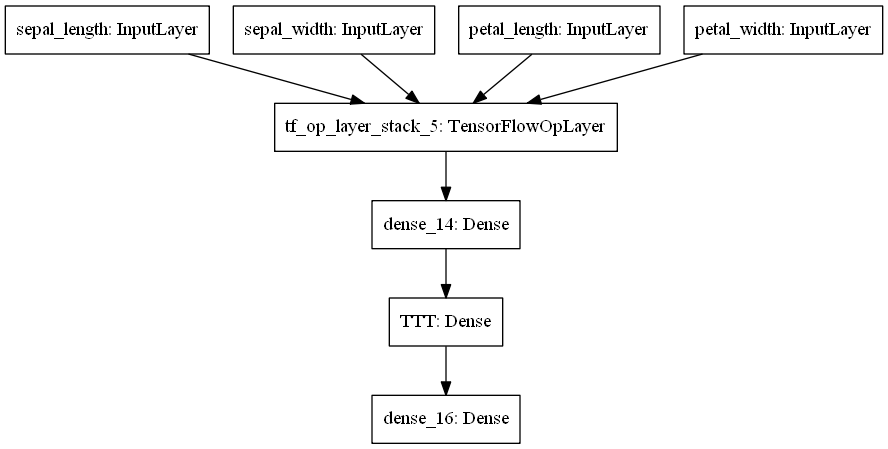

In [120]:
tf.keras.utils.plot_model(model_func)

In [121]:
# 그래서 summary로 항상 모델 구조를 확인하는 습관을 들여야 한다.
model_func.summary()

Model: "AAA"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
sepal_length (InputLayer)       [(None,)]            0                                            
__________________________________________________________________________________________________
sepal_width (InputLayer)        [(None,)]            0                                            
__________________________________________________________________________________________________
petal_length (InputLayer)       [(None,)]            0                                            
__________________________________________________________________________________________________
petal_width (InputLayer)        [(None,)]            0                                            
________________________________________________________________________________________________

In [123]:
# input부터 새로 만들면 모델을 새로 만들 수 있다.

x = tf.stack(list(inputs.values()), axis=-1)
x = tf.keras.layers.Dense(10, activation='relu', name='TTT')(x)
output = tf.keras.layers.Dense(1)(x)
model_func = tf.keras.Model(inputs=inputs, outputs=output, name='AAA')

model_func.summary()

Model: "AAA"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
sepal_length (InputLayer)       [(None,)]            0                                            
__________________________________________________________________________________________________
sepal_width (InputLayer)        [(None,)]            0                                            
__________________________________________________________________________________________________
petal_length (InputLayer)       [(None,)]            0                                            
__________________________________________________________________________________________________
petal_width (InputLayer)        [(None,)]            0                                            
________________________________________________________________________________________________

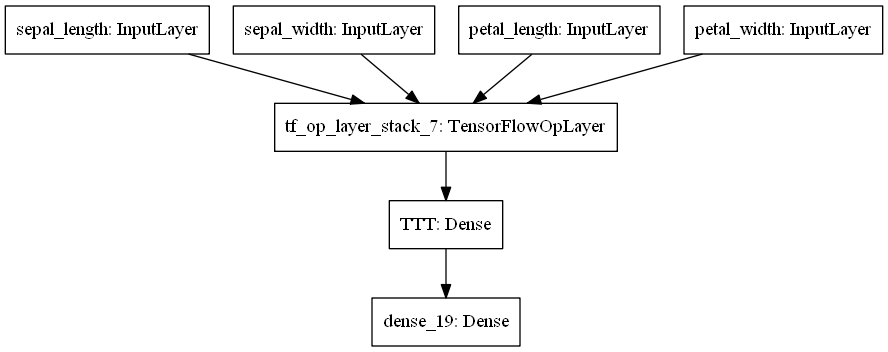

In [124]:
tf.keras.utils.plot_model(model_func)

### 도전

In [109]:
import pandas as pd
from sklearn.datasets import load_boston

In [137]:
data = load_boston()

In [138]:
data_ = pd.DataFrame(data.data, columns=data.feature_names)

In [139]:
data_['target'] = data.target

In [140]:
boston = data_.copy()

In [141]:
target = boston.pop('target')

In [142]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [161]:
inputs = {key:tf.keras.layers.Input(shape=(), name=key) for key in boston.keys()}

In [162]:
x = tf.stack(list(inputs.values()), axis=-1)

In [163]:
x

<tf.Tensor 'stack_13:0' shape=(None, 13) dtype=float32>

In [164]:
x = tf.keras.layers.Dense(64, activation='relu')(x)
model = tf.keras.models.Model(inputs=inputs, outputs=x)

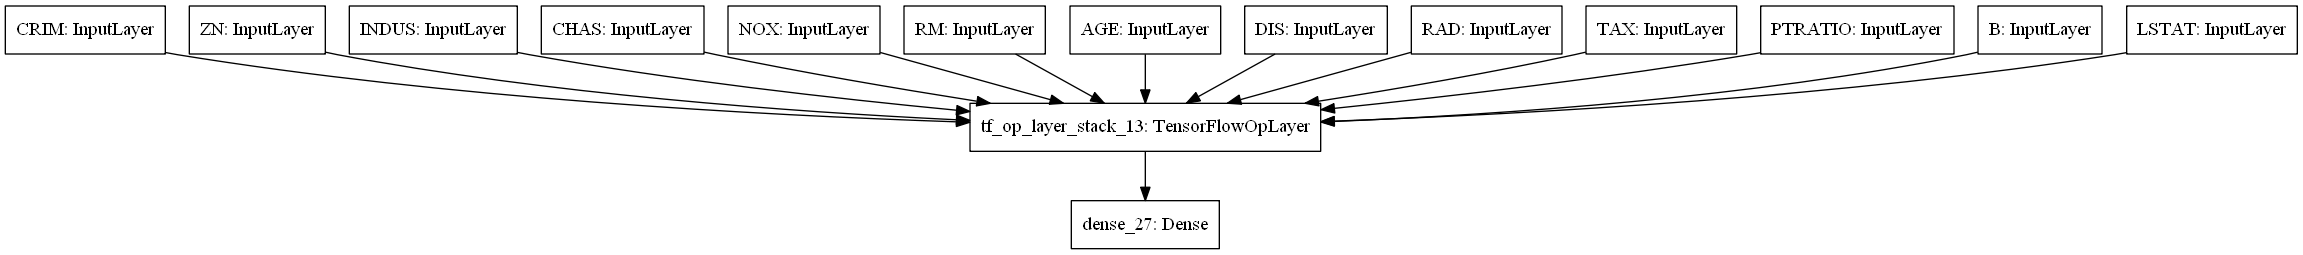

In [166]:
tf.keras.utils.plot_model(model)

In [174]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
CRIM (InputLayer)               [(None,)]            0                                            
__________________________________________________________________________________________________
ZN (InputLayer)                 [(None,)]            0                                            
__________________________________________________________________________________________________
INDUS (InputLayer)              [(None,)]            0                                            
__________________________________________________________________________________________________
CHAS (InputLayer)               [(None,)]            0                                            
____________________________________________________________________________________________

In [167]:
data = tf.data.Dataset.from_tensor_slices((boston.to_dict('list'), target)).batch(20)

In [168]:
model.compile(loss='mse', optimizer='adam')

In [169]:
model.fit(data, epochs=5)

Epoch 1/5
26/26 [==============================] - 1s 19ms/step - loss: 2620.4313
Epoch 2/5
26/26 [==============================] - 0s 6ms/step - loss: 1805.5315
Epoch 3/5
26/26 [==============================] - 0s 5ms/step - loss: 1286.9033
Epoch 4/5
26/26 [==============================] - 0s 7ms/step - loss: 955.1939
Epoch 5/5
26/26 [==============================] - 0s 5ms/step - loss: 739.1596


`stack`을 사용하지 않고 기존에 만들던 방식대로 만들었을 때와 비교를 해보자.

In [170]:
mo = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(1)
])

In [171]:
mo.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 65        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [172]:
mo.compile(loss='mse', optimizer='adam')

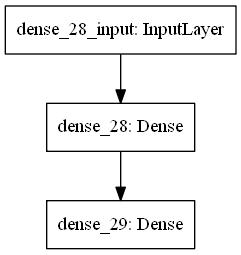

In [173]:
tf.keras.utils.plot_model(mo)

**pandas DataFrame을 tensor로 바꾸지 않고 그냥 넣어도 학습할 수 있다.**

In [175]:
mo.fit(boston, target, epochs=5)

W0610 21:04:32.133747 18184 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


Train on 506 samples
Epoch 1/5
506/506 [==============================] - 0s 123us/sample - loss: 513.1976
Epoch 2/5
506/506 [==============================] - 0s 51us/sample - loss: 141.7918
Epoch 3/5
506/506 [==============================] - 0s 53us/sample - loss: 96.5853
Epoch 4/5
506/506 [==============================] - 0s 47us/sample - loss: 78.4134
Epoch 5/5
506/506 [==============================] - 0s 43us/sample - loss: 73.4967


### 정형데이터 (고급)

이번 수업은 tensorflow 공식 tutorial [정형데이터 다루기](https://www.tensorflow.org/tutorials/structured_data/feature_columns)을 참조하였습니다.

In [184]:
URL = 'https://storage.googleapis.com/applied-dl/heart.csv'
dataframe = pd.read_csv(URL)

In [185]:
dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,52,1,1,118,186,0,2,190,0,0.0,2,0,fixed,0
299,43,0,4,132,341,1,2,136,1,3.0,2,0,reversible,1
300,65,1,4,135,254,0,2,127,0,2.8,2,1,reversible,1
301,48,1,4,130,256,1,2,150,1,0.0,1,2,reversible,1


In [186]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


In [187]:
# thal은 object type이다.
dataframe.thal.value_counts()

normal        168
reversible    115
fixed          18
1               1
2               1
Name: thal, dtype: int64

In [188]:
from sklearn.model_selection import train_test_split

In [190]:
X_train, X_test, y_train, y_test = train_test_split(dataframe.iloc[:, :-1], dataframe.target)

In [196]:
data = tf.data.Dataset.from_tensor_slices((X_train.to_dict('list'), y_train))

`dict`보다 `to_dict`가 더 명확하다.

In [192]:
dict(X_train)

{'age': 173    47
 175    54
 187    41
 49     48
 298    52
        ..
 158    38
 206    57
 221    64
 195    52
 90     59
 Name: age, Length: 227, dtype: int64,
 'sex': 173    1
 175    1
 187    1
 49     1
 298    1
       ..
 158    1
 206    1
 221    1
 195    1
 90     1
 Name: sex, Length: 227, dtype: int64,
 'cp': 173    4
 175    4
 187    2
 49     2
 298    1
       ..
 158    1
 206    2
 221    1
 195    4
 90     1
 Name: cp, Length: 227, dtype: int64,
 'trestbps': 173    112
 175    110
 187    110
 49     130
 298    118
       ... 
 158    120
 206    124
 221    170
 195    125
 90     170
 Name: trestbps, Length: 227, dtype: int64,
 'chol': 173    204
 175    206
 187    235
 49     245
 298    186
       ... 
 158    231
 206    261
 221    227
 195    212
 90     288
 Name: chol, Length: 227, dtype: int64,
 'fbs': 173    0
 175    0
 187    0
 49     0
 298    0
       ..
 158    0
 206    0
 221    0
 195    0
 90     0
 Name: fbs, Length: 227, dtype: int64,

In [195]:
X_train.to_dict('list')

{'age': [47,
  54,
  41,
  48,
  52,
  59,
  59,
  68,
  67,
  61,
  57,
  53,
  63,
  63,
  63,
  70,
  39,
  58,
  60,
  49,
  63,
  61,
  56,
  40,
  59,
  43,
  44,
  42,
  57,
  59,
  49,
  58,
  45,
  55,
  69,
  65,
  44,
  67,
  55,
  49,
  42,
  37,
  56,
  57,
  61,
  54,
  59,
  56,
  68,
  54,
  60,
  55,
  68,
  43,
  51,
  46,
  59,
  54,
  62,
  68,
  58,
  51,
  63,
  71,
  56,
  43,
  57,
  59,
  66,
  67,
  64,
  34,
  58,
  60,
  60,
  48,
  54,
  62,
  58,
  46,
  45,
  77,
  64,
  60,
  41,
  45,
  64,
  58,
  57,
  60,
  51,
  61,
  35,
  55,
  61,
  65,
  46,
  64,
  60,
  43,
  41,
  59,
  48,
  41,
  59,
  54,
  67,
  54,
  54,
  56,
  45,
  29,
  52,
  56,
  42,
  51,
  50,
  54,
  43,
  44,
  34,
  71,
  62,
  64,
  60,
  65,
  50,
  53,
  62,
  57,
  43,
  55,
  53,
  53,
  49,
  56,
  41,
  46,
  48,
  46,
  50,
  61,
  62,
  44,
  60,
  69,
  51,
  54,
  59,
  61,
  57,
  44,
  44,
  51,
  55,
  45,
  60,
  42,
  47,
  63,
  60,
  70,
  53,
  49,
  70,
  7

In [197]:
data

<TensorSliceDataset shapes: ({age: (), sex: (), cp: (), trestbps: (), chol: (), fbs: (), restecg: (), thalach: (), exang: (), oldpeak: (), slope: (), ca: (), thal: ()}, ()), types: ({age: tf.int32, sex: tf.int32, cp: tf.int32, trestbps: tf.int32, chol: tf.int32, fbs: tf.int32, restecg: tf.int32, thalach: tf.int32, exang: tf.int32, oldpeak: tf.float32, slope: tf.int32, ca: tf.int32, thal: tf.string}, tf.int32)>

In [198]:
# batch
data = tf.data.Dataset.from_tensor_slices((X_train.to_dict('list'), y_train)).batch(32)

In [199]:
data

<BatchDataset shapes: ({age: (None,), sex: (None,), cp: (None,), trestbps: (None,), chol: (None,), fbs: (None,), restecg: (None,), thalach: (None,), exang: (None,), oldpeak: (None,), slope: (None,), ca: (None,), thal: (None,)}, (None,)), types: ({age: tf.int32, sex: tf.int32, cp: tf.int32, trestbps: tf.int32, chol: tf.int32, fbs: tf.int32, restecg: tf.int32, thalach: tf.int32, exang: tf.int32, oldpeak: tf.float32, slope: tf.int32, ca: tf.int32, thal: tf.string}, tf.int32)>

In [200]:
# shuffle
data = tf.data.Dataset.from_tensor_slices((X_train.to_dict('list'), y_train)).shuffle(32)

In [201]:
data

<ShuffleDataset shapes: ({age: (), sex: (), cp: (), trestbps: (), chol: (), fbs: (), restecg: (), thalach: (), exang: (), oldpeak: (), slope: (), ca: (), thal: ()}, ()), types: ({age: tf.int32, sex: tf.int32, cp: tf.int32, trestbps: tf.int32, chol: tf.int32, fbs: tf.int32, restecg: tf.int32, thalach: tf.int32, exang: tf.int32, oldpeak: tf.float32, slope: tf.int32, ca: tf.int32, thal: tf.string}, tf.int32)>

값을 하나만 꺼내보는 방법에는 다음 방법들이 있다.

In [203]:
# 1. for - break를 활용하는 방법
for i in data.take(1):
    print(i)
    break

({'age': <tf.Tensor: id=6173, shape=(), dtype=int32, numpy=59>, 'sex': <tf.Tensor: id=6181, shape=(), dtype=int32, numpy=1>, 'cp': <tf.Tensor: id=6176, shape=(), dtype=int32, numpy=4>, 'trestbps': <tf.Tensor: id=6185, shape=(), dtype=int32, numpy=110>, 'chol': <tf.Tensor: id=6175, shape=(), dtype=int32, numpy=239>, 'fbs': <tf.Tensor: id=6178, shape=(), dtype=int32, numpy=0>, 'restecg': <tf.Tensor: id=6180, shape=(), dtype=int32, numpy=2>, 'thalach': <tf.Tensor: id=6184, shape=(), dtype=int32, numpy=142>, 'exang': <tf.Tensor: id=6177, shape=(), dtype=int32, numpy=1>, 'oldpeak': <tf.Tensor: id=6179, shape=(), dtype=float32, numpy=1.2>, 'slope': <tf.Tensor: id=6182, shape=(), dtype=int32, numpy=2>, 'ca': <tf.Tensor: id=6174, shape=(), dtype=int32, numpy=1>, 'thal': <tf.Tensor: id=6183, shape=(), dtype=string, numpy=b'reversible'>}, <tf.Tensor: id=6186, shape=(), dtype=int32, numpy=1>)


In [207]:
# 결과가 괄호로 시작하면 len을 해보는 테크닉
for i in data.take(1):
    print(len(i))
    break

2


In [209]:
# take를 했을때만 괄호가 보인다.
data

<ShuffleDataset shapes: ({age: (), sex: (), cp: (), trestbps: (), chol: (), fbs: (), restecg: (), thalach: (), exang: (), oldpeak: (), slope: (), ca: (), thal: ()}, ()), types: ({age: tf.int32, sex: tf.int32, cp: tf.int32, trestbps: tf.int32, chol: tf.int32, fbs: tf.int32, restecg: tf.int32, thalach: tf.int32, exang: tf.int32, oldpeak: tf.float32, slope: tf.int32, ca: tf.int32, thal: tf.string}, tf.int32)>

In [215]:
# 2개니까 unpacking할 수 있다.
for i, j in data.take(1):
    print(j)

tf.Tensor(0, shape=(), dtype=int32)


In [204]:
# 2. iter를 활용하는 방법
x = iter(data)

In [206]:
next(x)

({'age': <tf.Tensor: id=6192, shape=(), dtype=int32, numpy=48>,
  'sex': <tf.Tensor: id=6200, shape=(), dtype=int32, numpy=1>,
  'cp': <tf.Tensor: id=6195, shape=(), dtype=int32, numpy=2>,
  'trestbps': <tf.Tensor: id=6204, shape=(), dtype=int32, numpy=130>,
  'chol': <tf.Tensor: id=6194, shape=(), dtype=int32, numpy=245>,
  'fbs': <tf.Tensor: id=6197, shape=(), dtype=int32, numpy=0>,
  'restecg': <tf.Tensor: id=6199, shape=(), dtype=int32, numpy=2>,
  'thalach': <tf.Tensor: id=6203, shape=(), dtype=int32, numpy=180>,
  'exang': <tf.Tensor: id=6196, shape=(), dtype=int32, numpy=0>,
  'oldpeak': <tf.Tensor: id=6198, shape=(), dtype=float32, numpy=0.2>,
  'slope': <tf.Tensor: id=6201, shape=(), dtype=int32, numpy=2>,
  'ca': <tf.Tensor: id=6193, shape=(), dtype=int32, numpy=0>,
  'thal': <tf.Tensor: id=6202, shape=(), dtype=string, numpy=b'normal'>},
 <tf.Tensor: id=6205, shape=(), dtype=int32, numpy=0>)

In [208]:
# 결과가 괄호로 시작하면 len을 해보는 테크닉
len(next(x))

2

#### feature_column

In [216]:
from tensorflow import feature_column

In [217]:
dir(feature_column) # 처음보면 dir

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'bucketized_column',
 'categorical_column_with_hash_bucket',
 'categorical_column_with_identity',
 'categorical_column_with_vocabulary_file',
 'categorical_column_with_vocabulary_list',
 'crossed_column',
 'embedding_column',
 'indicator_column',
 'make_parse_example_spec',
 'numeric_column',
 'sequence_categorical_column_with_hash_bucket',
 'sequence_categorical_column_with_identity',
 'sequence_categorical_column_with_vocabulary_file',
 'sequence_categorical_column_with_vocabulary_list',
 'sequence_numeric_column',
 'shared_embeddings',
 'weighted_categorical_column']

In [292]:
data = tf.data.Dataset.from_tensor_slices((X_train.to_dict('list'), y_train)).batch(5)

In [293]:
age = tf.feature_column.numeric_column('age')

In [294]:
x = next(iter(data))[0]

In [248]:
x

{'age': <tf.Tensor: id=9641, shape=(5,), dtype=int32, numpy=array([47, 54, 41, 48, 52])>,
 'sex': <tf.Tensor: id=9649, shape=(5,), dtype=int32, numpy=array([1, 1, 1, 1, 1])>,
 'cp': <tf.Tensor: id=9644, shape=(5,), dtype=int32, numpy=array([4, 4, 2, 2, 1])>,
 'trestbps': <tf.Tensor: id=9653, shape=(5,), dtype=int32, numpy=array([112, 110, 110, 130, 118])>,
 'chol': <tf.Tensor: id=9643, shape=(5,), dtype=int32, numpy=array([204, 206, 235, 245, 186])>,
 'fbs': <tf.Tensor: id=9646, shape=(5,), dtype=int32, numpy=array([0, 0, 0, 0, 0])>,
 'restecg': <tf.Tensor: id=9648, shape=(5,), dtype=int32, numpy=array([0, 2, 0, 2, 2])>,
 'thalach': <tf.Tensor: id=9652, shape=(5,), dtype=int32, numpy=array([143, 108, 153, 180, 190])>,
 'exang': <tf.Tensor: id=9645, shape=(5,), dtype=int32, numpy=array([0, 1, 0, 0, 0])>,
 'oldpeak': <tf.Tensor: id=9647, shape=(5,), dtype=float32, numpy=array([0.1, 0. , 0. , 0.2, 0. ], dtype=float32)>,
 'slope': <tf.Tensor: id=9650, shape=(5,), dtype=int32, numpy=array([

In [249]:
tf.keras.layers.DenseFeatures(age)(x)

<tf.Tensor: id=9665, shape=(5, 1), dtype=float32, numpy=
array([[47.],
       [54.],
       [41.],
       [48.],
       [52.]], dtype=float32)>

In [255]:
# pd.cut과 비슷함
# bucketized_column는 구간을 직접 지정함
age = tf.feature_column.numeric_column('age')
age_cut = tf.feature_column.bucketized_column(age, [10,20,30,40,50])

In [251]:
pd.cut(dataframe.age, 2) # 구간의 길이가 동등하게 잘라준다.
pd.qcut(dataframe.age, 3) # 퍼센트로 잘라준다.

0        (59.0, 77.0]
1        (59.0, 77.0]
2        (59.0, 77.0]
3      (28.999, 51.0]
4      (28.999, 51.0]
            ...      
298      (51.0, 59.0]
299    (28.999, 51.0]
300      (59.0, 77.0]
301    (28.999, 51.0]
302      (59.0, 77.0]
Name: age, Length: 303, dtype: category
Categories (3, interval[float64]): [(28.999, 51.0] < (51.0, 59.0] < (59.0, 77.0]]

In [256]:
# 구간별로 자른 후에 원핫인코딩까지 해주었다.
tf.keras.layers.DenseFeatures(age_cut)(x)

<tf.Tensor: id=9685, shape=(5, 6), dtype=float32, numpy=
array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)>

In [257]:
# categorical_column~ 은 단독으로 쓸 수 없다.
thal = tf.feature_column.categorical_column_with_vocabulary_list('thal', ['normal', 'reversible', 'fixed'])

In [ ]:
# Error
tf.keras.layers.DenseFeatures(thal)(x)

In [261]:
# categorical_column~ 은 indicator_column과 같이 써야한다.
# 또는 embedding_column과 함께 써야한다.
thal_ind = tf.feature_column.indicator_column(thal)

In [262]:
# 원핫인코딩되었다.
tf.keras.layers.DenseFeatures(thal_ind)(x)

W0610 22:09:48.777890 18184 deprecation.py:323] From C:\Users\JINHYO\Anaconda3\lib\site-packages\tensorflow_core\python\feature_column\feature_column_v2.py:4276: IndicatorColumn._variable_shape (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed in a future version.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
W0610 22:09:48.778906 18184 deprecation.py:323] From C:\Users\JINHYO\Anaconda3\lib\site-packages\tensorflow_core\python\feature_column\feature_column_v2.py:4331: VocabularyListCategoricalColumn._num_buckets (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed in a future version.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


<tf.Tensor: id=9722, shape=(5, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)>

In [274]:
thal_em = tf.feature_column.embedding_column(thal, 5)

In [264]:
tf.keras.layers.DenseFeatures(thal_em)(x)

<tf.Tensor: id=9819, shape=(5, 5), dtype=float32, numpy=
array([[ 0.07542527, -0.03612722, -0.17579335,  0.3694233 ,  0.27426416],
       [ 0.07542527, -0.03612722, -0.17579335,  0.3694233 ,  0.27426416],
       [ 0.07542527, -0.03612722, -0.17579335,  0.3694233 ,  0.27426416],
       [ 0.07542527, -0.03612722, -0.17579335,  0.3694233 ,  0.27426416],
       [ 0.78179294, -0.8924059 , -0.05177223,  0.1456567 , -0.08977021]],
      dtype=float32)>

In [ ]:
# indicator가 좋을까? embedding이 좋을까?
# 상황에 따라 다르다. 절대적인 법칙은 없다.
# embedding 방법의 장점은 차원의 크기를 내가 지정할 수 있다는 점이다.
# 상대적인 크기에 따라야 한다. column 몇 개 이상은 embedding 쓴다. -> 오답

In [269]:
# 기존 컬럼은 제거하면서 새로운 피쳐를 생성한다.
# 더 강력한 모델을 만드는 기법으로 사용된다.
# 통계쪽에서는 잘 안 사용한다.
cr = tf.feature_column.crossed_column([age_cut, thal], 100)

In [270]:
cr_ind = tf.feature_column.indicator_column(cr)

In [272]:
tf.keras.layers.DenseFeatures(cr_ind)(x)

W0610 22:28:41.881493 18184 deprecation.py:323] From C:\Users\JINHYO\Anaconda3\lib\site-packages\tensorflow_core\python\feature_column\feature_column_v2.py:4331: CrossedColumn._num_buckets (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed in a future version.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


<tf.Tensor: id=9896, shape=(5, 100), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0.,

In [276]:
age_buckets = feature_column.bucketized_column(age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])

In [277]:
# list로 여러개 한꺼번에 넣어도 된다.
tf.keras.layers.DenseFeatures([age, age_buckets, thal_ind])(x)

<tf.Tensor: id=10011, shape=(5, 15), dtype=float32, numpy=
array([[47.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.],
       [54.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
         0.,  0.],
       [41.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.],
       [48.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.],
       [52.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.]], dtype=float32)>

In [279]:
# list에 값이 한개만 있어도 된다.
# list가 아닐때와 같다. (universal)
tf.keras.layers.DenseFeatures([age])(x)

<tf.Tensor: id=10022, shape=(5, 1), dtype=float32, numpy=
array([[47.],
       [54.],
       [41.],
       [48.],
       [52.]], dtype=float32)>

In [284]:
# DenseFeatures도 레이어로 사용할 수 있다.
l = tf.keras.layers.DenseFeatures([age])

In [285]:
# input_shape을 쓸 필요가 없다. 
# 앞에서 정해주기 때문이다.
model = tf.keras.models.Sequential([
    l,
    tf.keras.layers.Dense(64)
])

In [ ]:
# fit(또는 build)하면 automatic으로 input_shape을 정해준다.
# fit을 아직 안 했기 때문에 에러가 발생한다.
model.summary()